# melanoma detection using CNN

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Rescaling, BatchNormalization
from tensorflow.keras.utils import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Defining the path for train and test images


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

**Please note:  Change below the path_to_image_directory to your directory path correctly**. **Otherwise code will not run further**.


In [ ]:
## Please note to change the path_to_image_directory to your directory path correctly.
input_path_to_image='/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
input_path_to_train=input_path_to_image+'/Train'
input_path_to_test=input_path_to_image+'/Test'

In [ ]:
images_folder=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis',
                    'seborrheic keratosis','squamous cell carcinoma','vascular lesion']

In [ ]:
train_images_path=[input_path_to_train+'/'+i for i in images_folder]
print(train_images_path)
data_dir_train=[pathlib.Path(i) for i in train_images_path]
train_images_paths=[list(i.glob('*.jpg'))  for i in data_dir_train]
train_image_counts=[len(i) for i in train_images_paths]
print(train_image_counts)


['/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis', '/content/drive/MyDrive/Google_Colab/Assignment/Skin can

In [ ]:
test_images_paths=[path_to_test_directory+'/'+i for i in images_folder]
print(test_images_paths)

data_dir_test=[pathlib.Path(i) for i in test_images_paths]
test_images_paths=[list(i.glob('*.jpg'))  for i in data_dir_test]
test_image_counts=[len(i) for i in test_images_paths]
print(test_image_counts)

['/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis', '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISI

### Create a dataset

#### Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
num_classes=9

#### Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    path_to_train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=image_folder_names,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(type(images),type(labels))
  print(images.shape,labels.shape)
  print(labels[:5,])

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 180, 180, 3) (32, 9)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(5, 9), dtype=float32)


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    path_to_train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=image_folder_names,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the training dataset

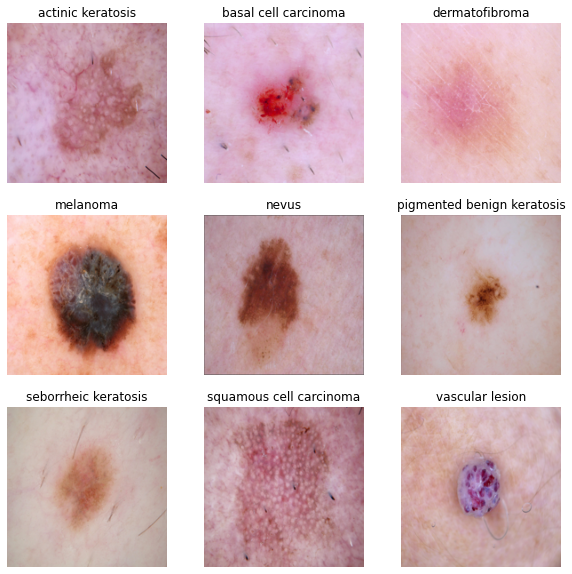

In [ ]:
fig = plt.figure(figsize=(10,10))
one_train_img_for_each_category =[ load_img(train_images_paths[i][0])  for i in range(len(train_images_paths)) ]
one_train_img_for_each_category =[  img.resize([180, 180]) for img in one_train_img_for_each_category ]
for i in range(num_classes):
    #print(train_images_paths[i][0])
    ax = plt.subplot(3, 3, i + 1)
    ax.set_title(class_names[i])
    plt.imshow(one_train_img_for_each_category[i])
    plt.axis('off')
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  #print(labels_batch)
  break

(32, 180, 180, 3)
(32, 9)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the **model 1**

Let's now build a basic CNN architecture. We do not need to build a very sophisticated CNN. 

We will build a network with:
- two convolutional layers having 32 and 64 filters respectively
- followed by a max pooling layer,  
- and then `Flatten` the output of the pooling layer to give us a long vector, 
- then add one fully connected `Dense` layer with 128 neurons each, and finally
- add a `softmax` layer with 9 neurons

The generic way to build a model in Keras is to instantiate a `Sequential` model and keep adding `keras.layers` to it. We will also use some dropouts.

In [ ]:
# M1 model architecture
model = Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3) ))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3) , padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.build()
model.summary()

### Compile the model 1
Choose an appropirate optimiser and loss function for model training 

We have experimented with diff optimizer and learning rate and found adam as optimizer with learning rate 0.0001 gives best performance.

We use categorical crossentrpy as loss fucntion since we are doing multiclass classification and we want probability distribution for each class. 

In [ ]:
# categorical cross entropy loss
# choose  optimiser as adam
# metric is accuracy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

### Train the model 1

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 121s 2s/step - loss: 1.9823 - accuracy: 0.3153 - val_loss: 1.7756 - val_accuracy: 0.4273
Epoch 2/20
56/56 [==============================] - 10s 180ms/step - loss: 1.6286 - accuracy: 0.4442 - val_loss: 1.5510 - val_accuracy: 0.5145
Epoch 3/20
56/56 [==============================] - 10s 182ms/step - loss: 1.4612 - accuracy: 0.4967 - val_loss: 1.5304 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 10s 184ms/step - loss: 1.3137 - accuracy: 0.5525 - val_loss: 1.5104 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 10s 187ms/step - loss: 1.2106 - accuracy: 0.5698 - val_loss: 1.3590 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 11s 189ms/step - loss: 1.1064 - accuracy: 0.6122 - val_loss: 1.3759 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 10s 185ms/step - loss: 1.0164 - accuracy: 0.6456 - val_loss: 1.4874 - val_accuracy: 0.4989
E

### Visualizing training results

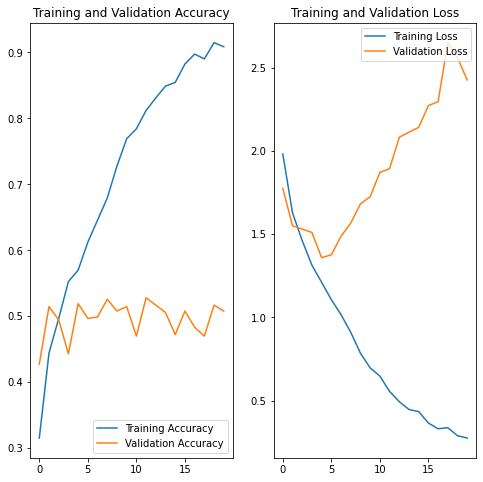

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### From the above graph, we can observe that training accuracy is coming 91% and validation accuracy is coming as 51%. 
This clearly indicates the model is overfitting

### Findings from Model 1

We can see high overfitting in the model prediction. To avoid this overfitting, we will try with agumenting the data.

In [ ]:

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

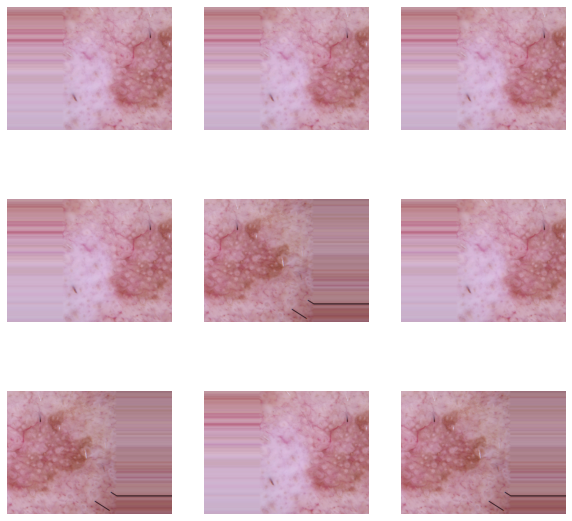

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
image = load_img(train_images_paths[0][0])

# convert to numpy array
data = img_to_array(image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize=(10, 10))
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
	plt.axis('off')
# show the figure
plt.show()


### Create the Model 2, compile and train


In [ ]:
# We will use RandomFlip and RandomRotation data augumentation strategy to avoid overfitting in training.

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
# M2 model architecture
model2 = Sequential()
model2.add(Rescaling(1./255, input_shape=(img_height, img_width, 3) ))
model2.add(data_augmentation)
model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3) , padding='same'))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [ ]:
model2.build()
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 64)     

### Compiling the Model 2

In [ ]:
# we use adam optimizer with learning rate as 0.0001
# loss function as categorical cross entropy
# metric is accuracy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

### Training the Model 2

In [ ]:
epochs = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 182ms/step - loss: 1.9434 - accuracy: 0.3114 - val_loss: 1.7312 - val_accuracy: 0.4004
Epoch 2/20
56/56 [==============================] - 10s 183ms/step - loss: 1.6409 - accuracy: 0.4252 - val_loss: 1.6018 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 10s 184ms/step - loss: 1.5238 - accuracy: 0.4621 - val_loss: 1.4842 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 10s 186ms/step - loss: 1.4672 - accuracy: 0.4927 - val_loss: 1.4836 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 11s 189ms/step - loss: 1.4178 - accuracy: 0.5078 - val_loss: 1.4646 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 11s 190ms/step - loss: 1.3922 - accuracy: 0.5246 - val_loss: 1.3893 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 11s 190ms/step - loss: 1.3234 - accuracy: 0.5234 - val_loss: 1.4278 - val_accuracy: 0.5101

### Visualizing the results

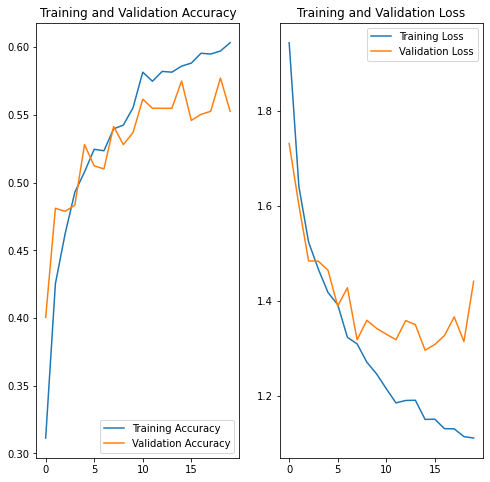

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We see now the training accuracy is 60% and testing accuracy is 55%. We have improved a lot to avoid overfitting compared to previous model. But we yet to increase the model performance.

#### Finding the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

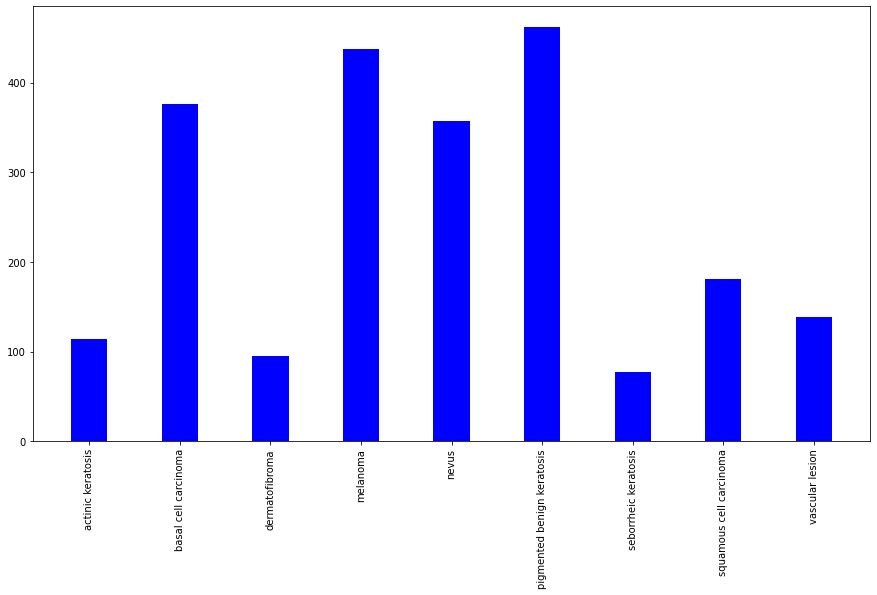

In [ ]:
## Your code goes here.
fig = plt.figure(figsize=(15,8))

# creating the bar plot
plt.bar(image_folder_names, train_image_counts, color ='blue',
        width = 0.4)
plt.xticks(rotation=90)

#### **Findings from Model 2**: Class imbalance is present.
- "seborrheic keratosis" class has the least number of samples.
- "pigmented benign keratosis", "Melanoma" dominate the data in terms proportionate number of samples.


#### Rectify the class imbalance
#### **Context:** I used a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=path_to_train_directory+"/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F03ACD2CD50>: 100%|██████████| 500/500 [00:20<00:00, 24.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F04AC155C10>: 100%|██████████| 500/500 [00:19<00:00, 25.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F04A803B750>: 100%|██████████| 500/500 [00:20<00:00, 24.32 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F04AD479710>: 100%|██████████| 500/500 [01:32<00:00,  5.38 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F04ABFFAE50>: 100%|██████████| 500/500 [01:35<00:00,  5.24 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F04A80A28D0>: 100%|██████████| 500/500 [00:20<00:00, 24.36 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F04ACDF2510>: 100%|██████████| 500/500 [00:42<00:00, 11.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F05451A10D0>: 100%|██████████| 500/500 [00:19<00:00, 25.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F04AC1BAF50>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total individual class count and total count of augmented images.

In [ ]:
# augumented image count for indivisual class
train_aug_image_folder_paths=[i+'/output' for i in train_image_folder_paths]
data_dir_train_aug=[pathlib.Path(i) for i in train_aug_image_folder_paths]
train_aug_images_paths=[list(i.glob('*.jpg'))  for i in data_dir_train_aug]
train_aug_image_counts=[len(i) for i in train_aug_images_paths]
print(train_aug_image_counts)

[500, 500, 500, 500, 500, 500, 500, 500, 500]


In [ ]:
# augumented image count for all class
data_dir_train = pathlib.Path(path_to_train_directory)
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


##### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028941.jpg_25c30e59-7834-4150-b861-3f8b9fbad9c7.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029781.jpg_015a985a-9820-4616-b134-945e71699215.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033151.jpg_1031c1b4-6dcf-4836-a19d-89edce69076d.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026194.jpg_2b707738-0661-494f-93cb-77d7de49a040.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International 

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
path_list_old = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_old

['/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030133.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027447.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029133.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028370.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026171.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027580.jpg',
 '/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The Intern

In [ ]:
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_old

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))

In [ ]:
original_df= pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])

In [ ]:
original_df.shape

(2239, 2)

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
df2.shape

(4500, 2)

In [ ]:
new_df = original_df.append(df2)

In [ ]:
new_df.shape

(6739, 2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the Model 3 on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train

PosixPath('/content/drive/MyDrive/Google_Colab/Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path_to_train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=image_folder_names,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path_to_train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=image_folder_names,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create Model 3 (make sure to include normalization)

Let's now build a basic CNN architecture. 

We will build a network with:
- two convolutional layers having 32 and 64 filters respectively
- followed by a max pooling layer,  
- and then `Flatten` the output of the pooling layer to give us a long vector, 
- then add two fully connected `Dense` layer with 128 and 256 neurons respectively, and finally
- add a `softmax` layer with 9 neurons

The generic way to build a model in Keras is to instantiate a `Sequential` model and keep adding `keras.layers` to it. We will also use some dropouts.

In [ ]:
## your code goes here
# M3 model architecture
model3 = Sequential()
model3.add(Rescaling(1./255, input_shape=(img_height, img_width, 3) ))
model3.add(data_augmentation)
model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3) , padding='same'))
model3.add(Activation('relu'))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.4))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

#### Compile Model 3 (Choose optimizer and loss function appropriately)

In [ ]:

# categorical cross entropy loss
# choose  optimiser as adam
# metric is accuracy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model3.build()
model3.summary()

#### Train Model 3

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 42s 236ms/step - loss: 1.9532 - accuracy: 0.2647 - val_loss: 1.6232 - val_accuracy: 0.4261
Epoch 2/50
169/169 [==============================] - 41s 236ms/step - loss: 1.6139 - accuracy: 0.3813 - val_loss: 1.4242 - val_accuracy: 0.4818
Epoch 3/50
169/169 [==============================] - 41s 236ms/step - loss: 1.4741 - accuracy: 0.4431 - val_loss: 1.3604 - val_accuracy: 0.4803
Epoch 4/50
169/169 [==============================] - 39s 228ms/step - loss: 1.4195 - accuracy: 0.4520 - val_loss: 1.3077 - val_accuracy: 0.5264
Epoch 5/50
169/169 [==============================] - 40s 227ms/step - loss: 1.3748 - accuracy: 0.4731 - val_loss: 1.2881 - val_accuracy: 0.5160
Epoch 6/50
169/169 [==============================] - 40s 227ms/step - loss: 1.3328 - accuracy: 0.4865 - val_loss: 1.2545 - val_accuracy: 0.5226
Epoch 7/50
169/169 [==============================] - 42s 243ms/step - loss: 1.2947 - accuracy: 0.5037 - val_loss: 1.2158 - val_ac

#### **Todo:**  Visualize the model results

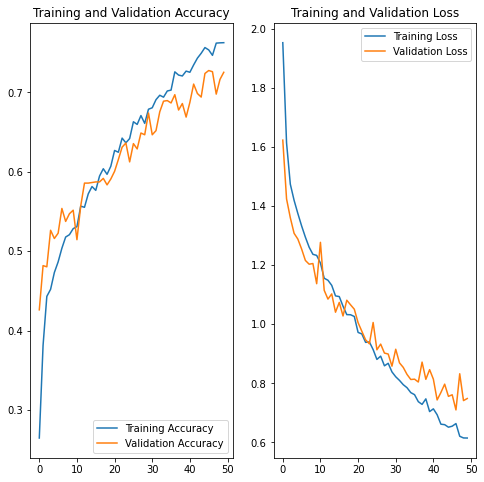

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings from Model 3: 
- We can see the training accuracy has reached to **76%** and validation accuracy has reached **72**%.

- We improvided in terms of model performance. Also, we see both training and accuracies are nearly same which means our model is able to generalize and henece we avoided model overfitting.

 - **Overall it looks like descent model. We may achieve greater accuracy with more epochs and tuning model hyperparameter and architecture.**